In [58]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
#Loadig Data
mental_health = pd.read_csv('survey.csv')

In [60]:
#Show first five rows of Data
mental_health.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [61]:
#Information about columns
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

In [62]:
# Top 10 countries in the survey
mental_health['Country'].value_counts().nlargest(10)

United States     751
United Kingdom    185
Canada             72
Germany            45
Ireland            27
Netherlands        27
Australia          21
France             13
India              10
New Zealand         8
Name: Country, dtype: int64

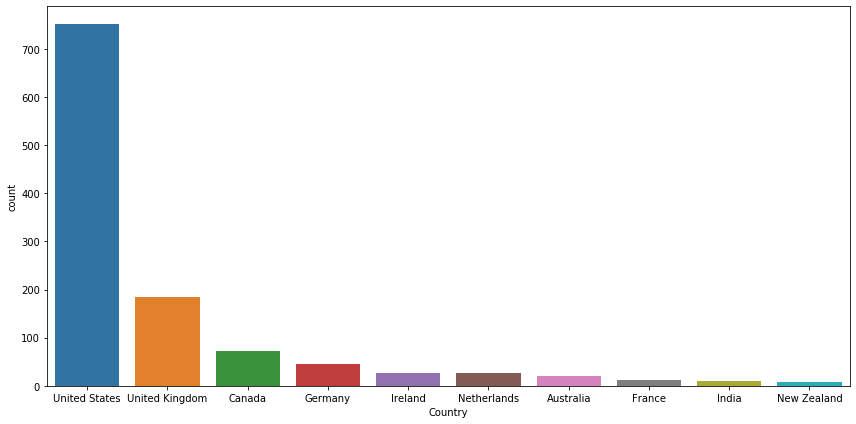

In [63]:
#Showing the results in count plot
top_countries = mental_health['Country'].value_counts().iloc[:10]

plt.figure(figsize=(12,6))
sns.countplot(x ='Country', data=mental_health,order = top_countries.index) 
plt.tight_layout()

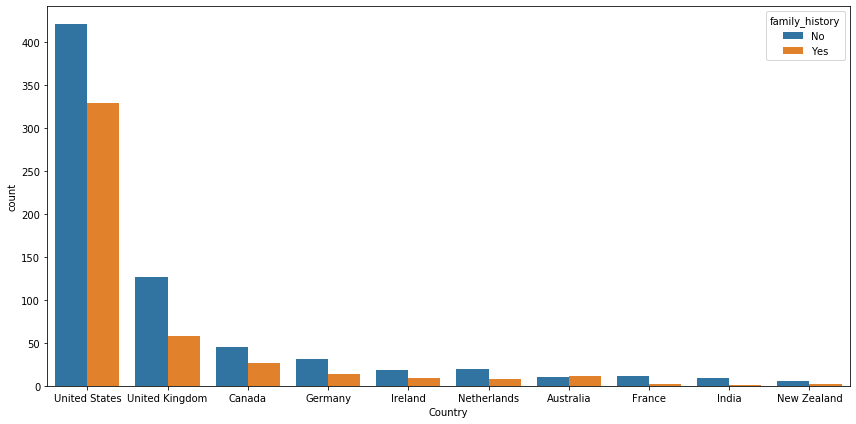

In [64]:
#Do you have a family history of mental illness?
plt.figure(figsize=(12,6))
sns.countplot(x ='Country',hue = 'family_history' ,
              data= mental_health ,order = top_countries.index) 
plt.tight_layout()

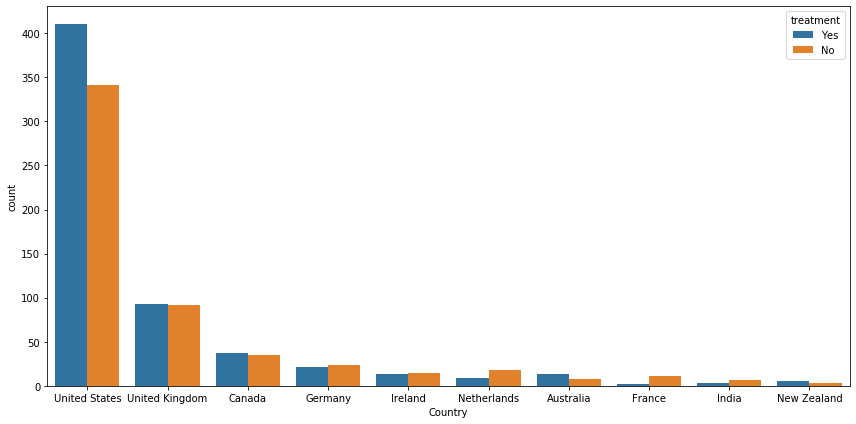

In [65]:
#Have you sought treatment for a mental health condition?
plt.figure(figsize=(12,6))
sns.countplot(x ='Country',hue = 'treatment' ,
              data= mental_health ,order = top_countries.index) 
plt.tight_layout()

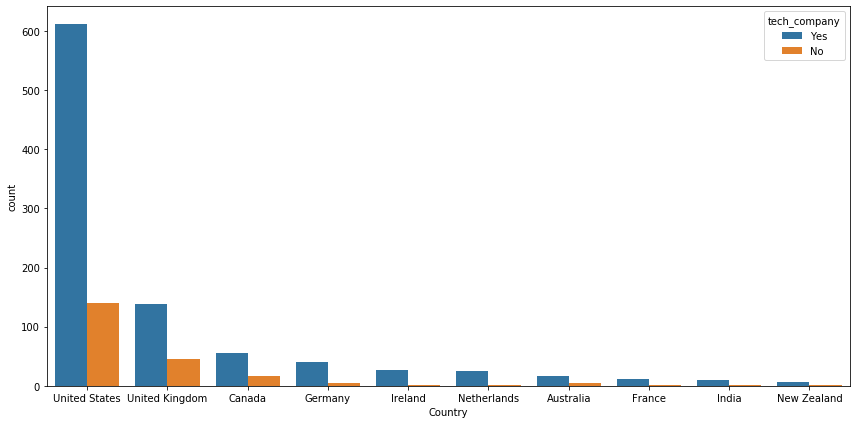

In [66]:
#Is your employer primarily a tech company/organization?
plt.figure(figsize=(12,6))
sns.countplot(x ='Country',hue = 'tech_company',
              data=mental_health,order = top_countries.index) 
plt.tight_layout()

In [69]:
#Creating gender groups to analyse gender category 

gender_male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr",
            "cis man", "Cis Male", "cis male"]

gender_female = ["cis female", "f", "female","woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

gender_trans = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid",
             "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman",
             "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]

for (row, col) in mental_health.iterrows():

    if str.lower(col.Gender) in gender_male:
       mental_health['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in gender_female:
        mental_health['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in gender_trans:
       mental_health['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Removing unknown values
mental_health_gender = mental_health[~mental_health['Gender'].isin(['A little about you', 'p'])]

#Printing categories of gender after coding
print(mental_health_gender['Gender'].unique())

['female' 'male' 'trans']


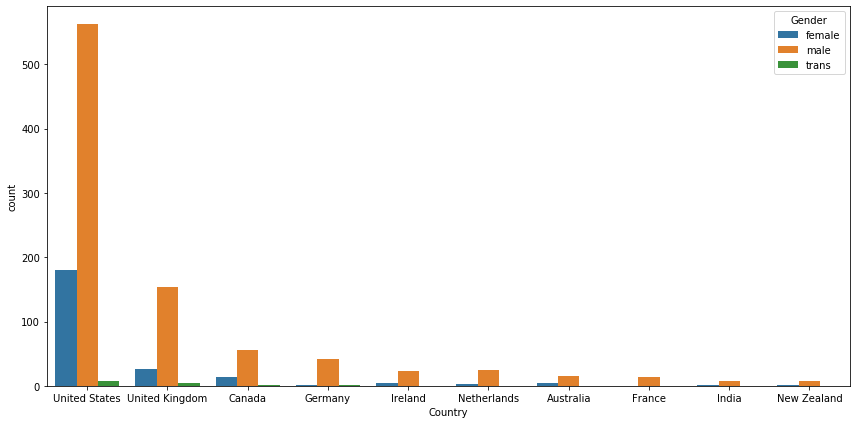

In [70]:
#Assessing new gender category for top 10 countries
plt.figure(figsize=(12,6))
sns.countplot(x ='Country',hue = 'Gender',
              data= mental_health_gender,order = top_countries.index) 
plt.tight_layout()

In [71]:
#Has your employer ever discussed mental health as part of an employee wellness program?
mental_health['wellness_program'] = mental_health['wellness_program'].replace('NA', 'Unknown' )
mental_health['wellness_program'].value_counts()

No            842
Yes           229
Don't know    188
Name: wellness_program, dtype: int64

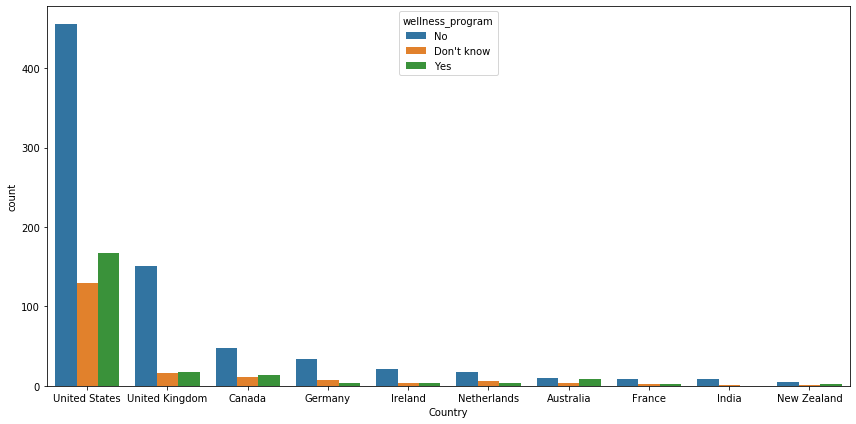

In [73]:
#Has your employer ever discussed mental health as part of an employee wellness program?
plt.figure(figsize=(12,6))
sns.countplot(x ='Country',hue = 'wellness_program',
              data=mental_health,order = top_countries.index) 
plt.tight_layout()

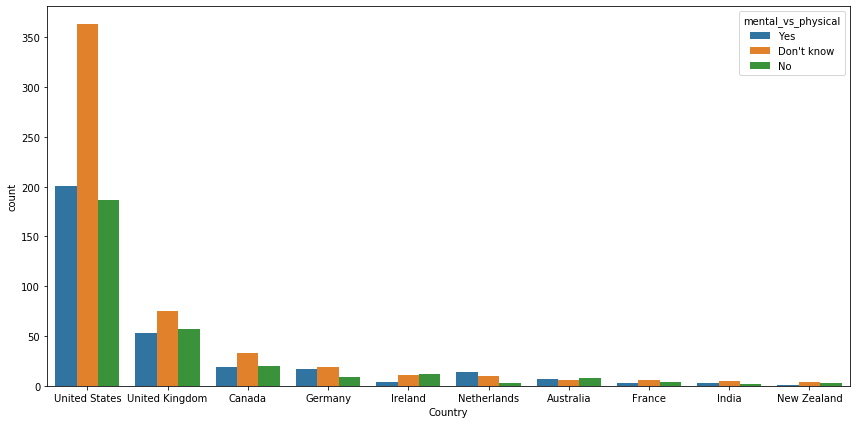

In [40]:
#Do you feel that your employer takes mental health as seriously as physical health?
plt.figure(figsize=(12,6))
sns.countplot(x ='Country',hue = 'mental_vs_physical' ,
              data= mental_health ,order = top_countries.index) 
plt.tight_layout()



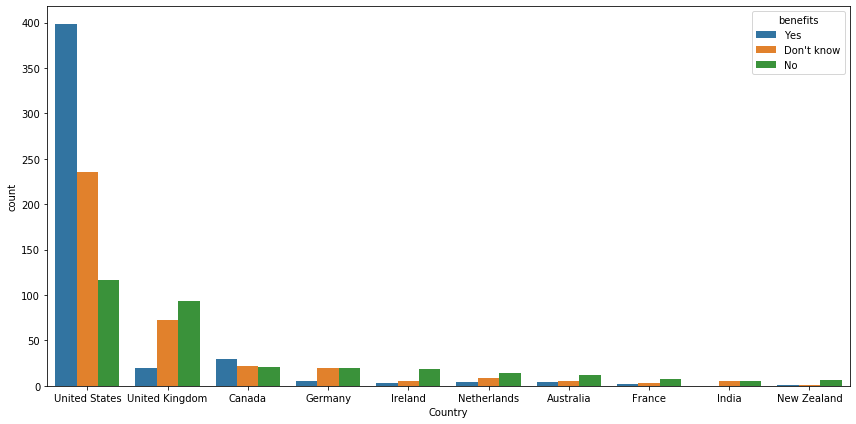

In [74]:
#Does your employer provide mental health benefits?
plt.figure(figsize=(12,6))
sns.countplot(x ='Country',hue = 'benefits' ,
              data= mental_health ,order = top_countries.index) 
plt.tight_layout()

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

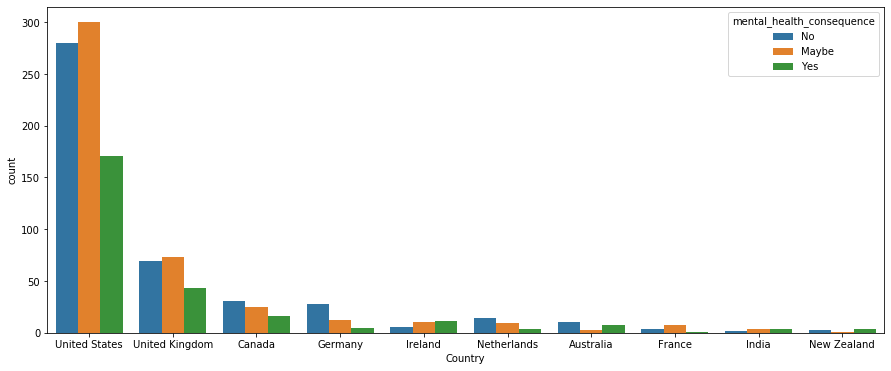

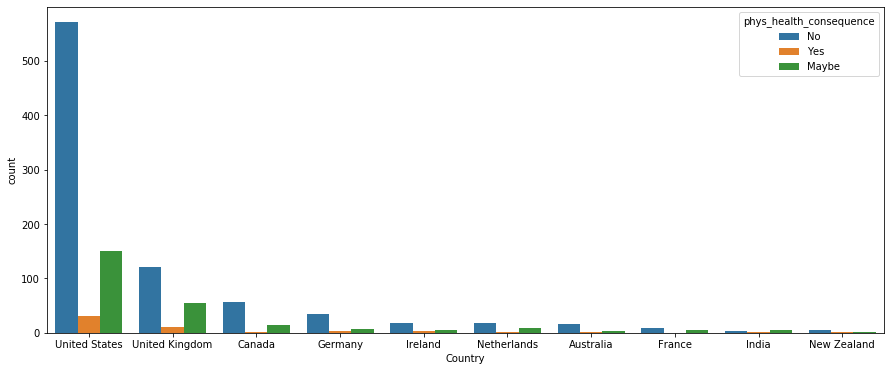

In [76]:
# Do you think that discussing a mental health issue with your employer would have negative consequences?
plt.figure(figsize=(15,6))
sns.countplot(x='Country',hue = 'mental_health_consequence' ,
              data= mental_health ,order = top_countries.index) 
plt.tight_layout

# Do you think that discussing a physical health issue with your employer would have negative consequences?
plt.figure(figsize=(15,6))
sns.countplot(x='Country',hue = 'phys_health_consequence' ,
              data= mental_health ,order = top_countries.index) 
plt.tight_layout